# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'>Using Edge Information to Improve Thresholding
#  <span style='font-family:"Times New Roman"'> Loading Required Modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import filters
import numpy as np

In [2]:
I = mpimg.imread('septagon-small.tif')
T_otsu=filters.threshold_otsu(I)
#Otsu implementation
result = I > T_otsu

In [3]:
#Averaging Kernel 
h_ave = np.ones((5,5)) / 25
I_smoothed = ndimage.convolve(I, h_ave,mode='nearest')
#Otsu implementation for smoothed Image
T_otsuave=filters.threshold_otsu(I_smoothed)
resultave = I_smoothed > T_otsuave

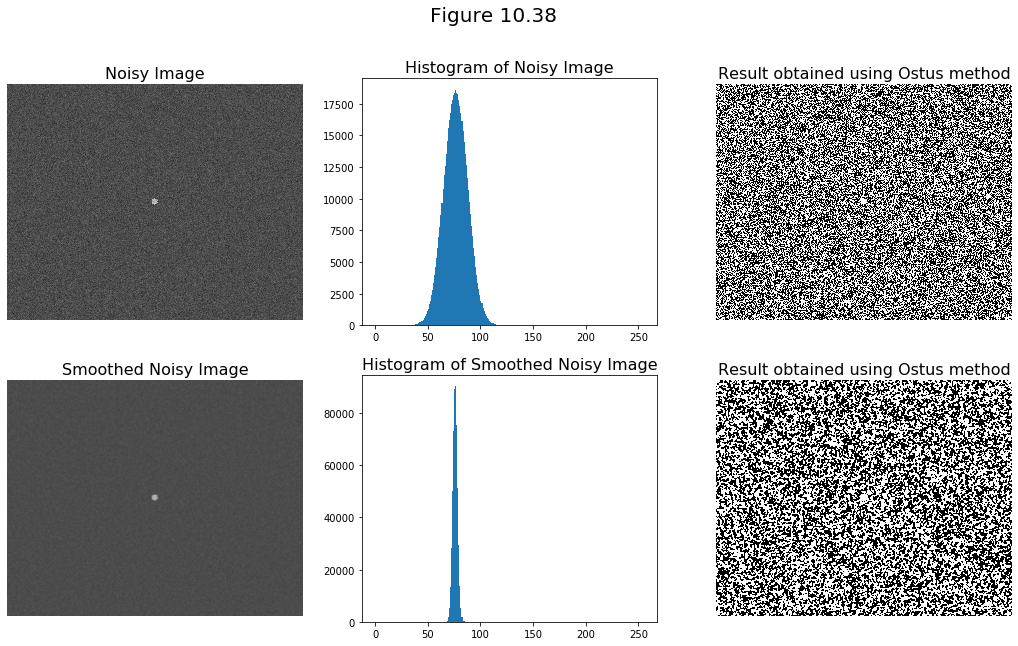

In [4]:
fig = plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
img=plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title('Noisy Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.hist(I.flatten(),bins=255,range=(0,255))
plt.title('Histogram of Noisy Image', fontsize = 16)
plt.subplot(2, 3, 3)
img=plt.imshow(result,cmap='gray')
plt.title('Result obtained using Ostus method', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 4)
img=plt.imshow(I_smoothed,cmap='gray',vmin=0,vmax=255)
plt.title('Smoothed Noisy Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 5)
plt.hist(I_smoothed.flatten(),bins=255,range=(0,255))
plt.title('Histogram of Smoothed Noisy Image', fontsize = 16)
plt.subplot(2, 3, 6)
img=plt.imshow(resultave,cmap='gray')
plt.title('Result obtained using Ostus method', fontsize = 16)
plt.axis('off')
fig.suptitle('Figure 10.38', fontsize = 20)
plt.show()

In [5]:
I = I.astype(np.float64)
#Sobel Kernels 
sobel_horiz = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
sobel_vert = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
gx = ndimage.convolve(I, sobel_horiz)
gy = ndimage.convolve(I, sobel_vert)
#Gradient Magnitude  
g = np.sqrt(gx**2 + gy**2)
#Thresholding   
thresh=np.percentile(g,99.7)
M = g > thresh
#Mask Design   
I_mask = g*M
T_otsu=filters.threshold_otsu(I[M])
result = I > T_otsu

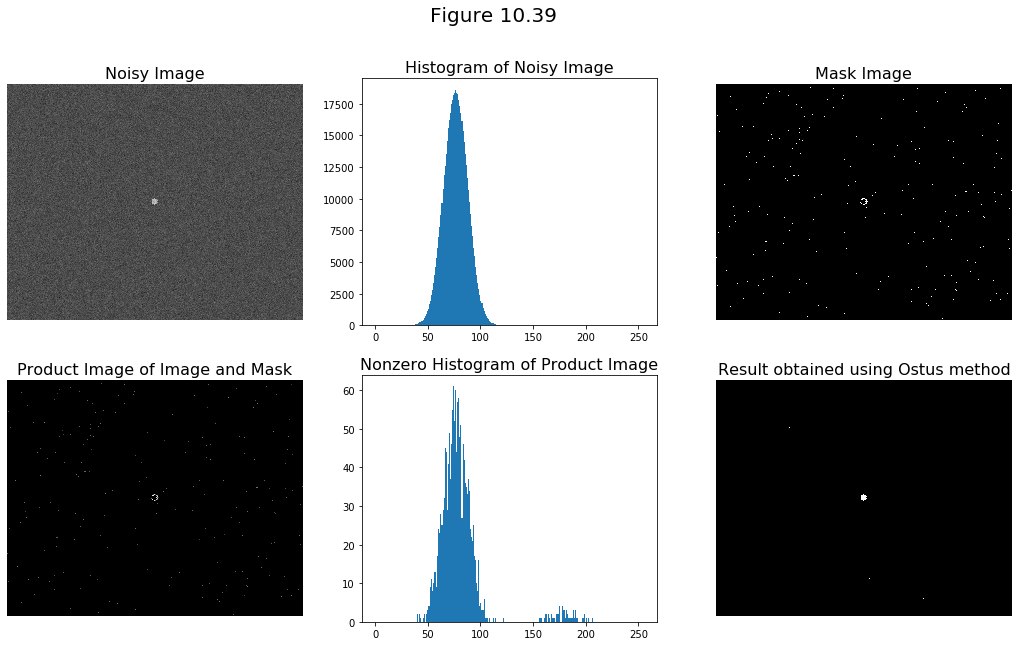

In [6]:
fig = plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
img=plt.imshow(I,cmap='gray',vmin=0,vmax=255)
plt.title('Noisy Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.hist(I.flatten(),bins=255,range=(0,255))
plt.title('Histogram of Noisy Image', fontsize = 16)
plt.subplot(2, 3, 3)
img=plt.imshow(M,cmap='gray')
plt.title('Mask Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 4)
img=plt.imshow(I*M,cmap='gray')
plt.title('Product Image of Image and Mask', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 5)
plt.hist(I[M].flatten(),bins=255,range=(0,255))
plt.title('Nonzero Histogram of Product Image', fontsize = 16)
plt.subplot(2, 3, 6)
img=plt.imshow(result,cmap='gray')
plt.title('Result obtained using Ostus method', fontsize = 16)
plt.axis('off')
fig.suptitle('Figure 10.39', fontsize = 20)
plt.show()